In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import torch
import shutil
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader

In [ ]:
torch.manual_seed(1111)
np.random.seed(1111)

In [ ]:
images_path = '/content/drive/MyDrive/Paper/images/'

df = pd.read_csv(images_path + "instruments.csv")

classes = df["labels"].unique()
num_classes = len(classes)

print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

labels = classes.tolist()

numeric_values = list(range(len(labels)))

label_mapping = {}
for label, numeric_value in zip(labels, numeric_values):
    label_mapping[label] = numeric_value

df['labels'] = df['labels'].map(label_mapping)

df

Number of classes: 30
Classes: ['acordian' 'alphorn' 'bagpipes' 'banjo' 'bongo drum' 'casaba' 'castanets'
 'clarinet' 'clavichord' 'concertina' 'Didgeridoo' 'drums' 'dulcimer'
 'flute' 'guiro' 'guitar' 'harmonica' 'harp' 'marakas' 'ocarina' 'piano'
 'saxaphone' 'sitar' 'steel drum' 'Tambourine' 'trombone' 'trumpet' 'tuba'
 'violin' 'Xylophone']


,filepaths,labels,data set
0,train/acordian/001.jpg,0,train
1,train/acordian/002.jpg,0,train
2,train/acordian/003.jpg,0,train
3,train/acordian/004.jpg,0,train
4,train/acordian/005.jpg,0,train
...,...,...,...
5088,valid/Xylophone/1.jpg,29,valid
5089,valid/Xylophone/2.jpg,29,valid
5090,valid/Xylophone/3.jpg,29,valid
5091,valid/Xylophone/4.jpg,29,valid


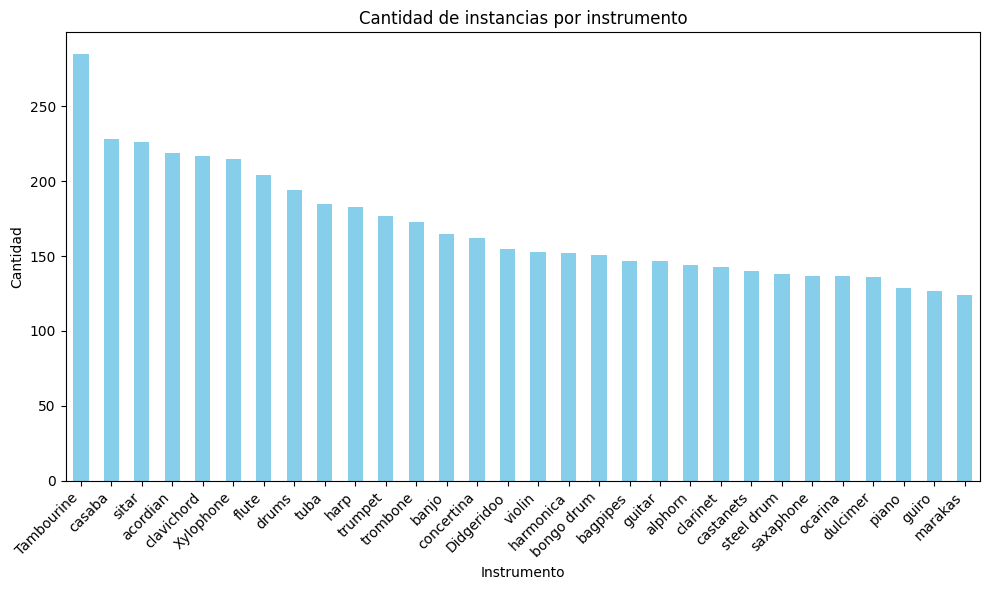

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame con la columna 'instrument'
df2 = pd.DataFrame()
df2['instrument'] = df['filepaths'].apply(lambda x: x.split('/')[1])

# Contar cuántos hay de cada instrumento en df2
instrument_count = df2['instrument'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
instrument_count.plot(kind='bar', color='skyblue')
plt.title('Cantidad de instancias por instrumento')
plt.xlabel('Instrumento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
training_df = pd.DataFrame()
test_df = pd.DataFrame()
val_df = pd.DataFrame()

for label in df['data set'].unique():
    if label == 'train':
        training_df = df[df['data set'] == label]
    elif label == 'test':
        test_df = df[df['data set'] == label]
    elif label == 'valid':
        val_df = df[df['data set'] == label]

print(df.shape[0], ", ", training_df.shape[0] + test_df.shape[0] + val_df.shape[0])

training_df = training_df.drop('data set', axis=1)
test_df = test_df.drop('data set', axis=1)
val_df = val_df.drop('data set', axis=1)

training_df = training_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# training_df
# test_df
val_df

5093 ,  5093


,filepaths,labels
0,valid/acordian/1.jpg,0
1,valid/acordian/2.jpg,0
2,valid/acordian/3.jpg,0
3,valid/acordian/4.jpg,0
4,valid/acordian/5.jpg,0
...,...,...
145,valid/Xylophone/1.jpg,29
146,valid/Xylophone/2.jpg,29
147,valid/Xylophone/3.jpg,29
148,valid/Xylophone/4.jpg,29


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Images


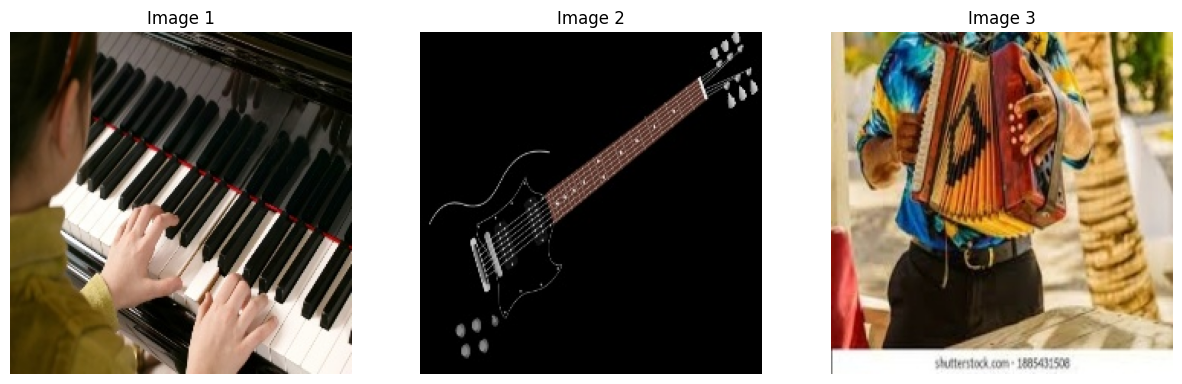

In [ ]:
# Load img1
img1 = cv2.imread('/content/drive/MyDrive/Paper/images/train/piano/094.jpg')

# Load img2
img2 = cv2.imread('/content/drive/MyDrive/Paper/images/train/guitar/108.jpg')

# Load img3
img3 = cv2.imread('/content/drive/MyDrive/Paper/images/train/acordian/128.jpg')

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# img1
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

# img2
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 2')
axes[1].axis('off')

# img3
axes[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
axes[2].set_title('Image 3')
axes[2].axis('off')

plt.show()

# RGB vs GrayScale

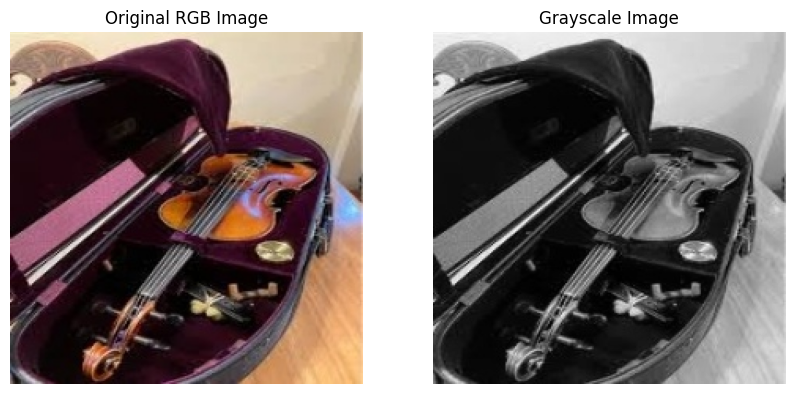

In [ ]:
# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/Paper/images/train/violin/141.jpg')

# Convert the original image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original RGB image
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

# Grayscale image
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.show()

# Data augmentation

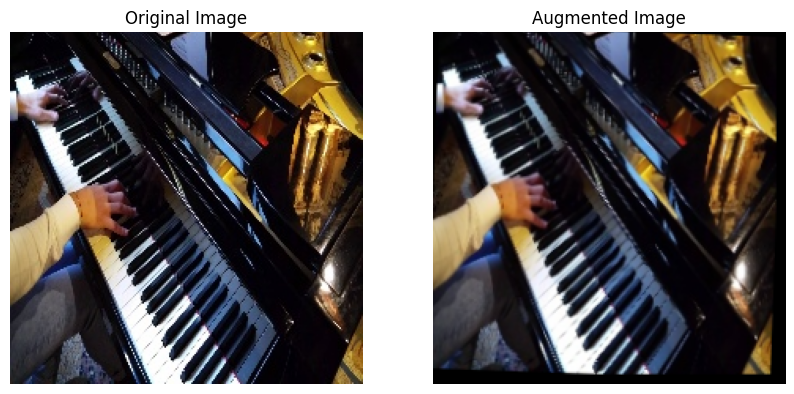

In [ ]:
# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/Paper/images/train/piano/017.jpg')

# Load the image
image = original_image.copy()

# Define random rotation angle between -30 and 30 degrees
angle = np.random.randint(-30, 30)

# Get image height and width
h, w = image.shape[:2]

# Define the rotation center
center = (w // 2, h // 2)

# Define the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Perform the rotation
rotated_image = cv2.warpAffine(image, M, (w, h))

# Define random zoom scale between 0.8 and 1.2
zoom_scale = np.random.uniform(0.8, 1.2)

# Define the zoom matrix
zoom_matrix = np.array([[zoom_scale, 0, 0], [0, zoom_scale, 0]])

# Apply the zoom
zoomed_image = cv2.warpAffine(rotated_image, zoom_matrix, (w, h))

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Augmented image
axes[1].imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Augmented Image')
axes[1].axis('off')

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [ ]:
def convert_grayscale_to_rgb(img):
    if img.mode == 'L':  # Check if it's grayscale
        w, h = img.size
        rgb_img = Image.new('RGB', (w, h))
        rgb_img.paste(img, (0, 0))
        return rgb_img
    else:
        return img  # Already RGB

In [ ]:
class MyTrainingDataset(Dataset):
    def __init__(self, df, directory_path, transform=None):
        self.data = df["filepaths"]  # Assuming your data are filepaths
        self.labels = df['labels']
        self.transform = transform
        self.directory_path = directory_path

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_path = self.data[index]
        img = Image.open(self.directory_path + img_path)  # Load the image from the filepath

        img = convert_grayscale_to_rgb(img)

        if self.transform:
            img = self.transform(img)  # Apply transformations if specified

        label = self.labels[index]
        label = torch.tensor(label, dtype=torch.long)
        return img, label

# RESNET18

In [ ]:
from torchvision.models import resnet18
from sklearn.metrics import precision_score
import torchvision.models as models
import torch.optim as optim

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create an instance of the ResNet18 model
model = resnet18(pretrained=False, num_classes=num_classes)
model = model.to(device)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Define the transformations you want to apply to the images
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Randomly crop the image and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(15),  # Randomly rotate the image by up to 15 degrees
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the tensor (assuming single-channel grayscale)
])

# Define data augmentation transforms for validation and test images
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the tensor (assuming single-channel grayscale)
])

dataset = MyTrainingDataset(training_df, images_path, transform=train_transform)
training_data_loader = DataLoader(dataset, batch_size=36, num_workers=2, shuffle=True)

test_dataset = MyTrainingDataset(test_df, images_path, transform=val_test_transform)
test_data_loader = DataLoader(test_dataset, batch_size=36, num_workers=2)

val_dataset = MyTrainingDataset(val_df, images_path, transform=val_test_transform)
val_data_loader = DataLoader(val_dataset, batch_size=36, num_workers=2)

test_df[5:50]
# val_df

,filepaths,labels
5,test/alphorn/1.jpg,1
6,test/alphorn/2.jpg,1
7,test/alphorn/3.jpg,1
8,test/alphorn/4.jpg,1
9,test/alphorn/5.jpg,1
10,test/bagpipes/1.jpg,2
11,test/bagpipes/2.jpg,2
12,test/bagpipes/3.jpg,2
13,test/bagpipes/4.jpg,2
14,test/bagpipes/5.jpg,2


In [ ]:
# # Define una función para mostrar una imagen y su etiqueta
# def show_image_label(sample, label):
#     # Convierte el tensor de la imagen a un arreglo NumPy y transpórtalo al formato de color correcto (de BGR a RGB)
#     img_np = sample.numpy().transpose((1, 2, 0))
#     # Muestra la imagen
#     plt.imshow(img_np)
#     # Muestra la etiqueta
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

# # Itera sobre el conjunto de datos y muestra cada muestra junto con su etiqueta
# for i in range(len(dataset2)):
#     sample, label = dataset[i]
#     print(f"Sample {i}:")
#     show_image_label(sample, label)
#     if i == 0:
#       break


## Training RESNET18 with RGB

In [ ]:
import torch
from sklearn.metrics import precision_score
from tqdm import tqdm

if not os.path.exists('/content/drive/MyDrive/Paper/models/'):
    os.makedirs('/content/drive/MyDrive/Paper/models/')

num_epochs = 36

RGB_loss_history = []
precision_history = []

best_precision = 0.0  # Initialize the best precision
best_model_path = "/content/drive/MyDrive/Paper/models/best_model_resnet18_rgb.pth"  # Path to save the best model

In [ ]:
# Training loop
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    all_preds = []
    all_labels = []
    for images, labels in training_data_loader:
        # print("test")
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Get predictions and true labels for precision calculation
        _, preds = torch.max(outputs, 1)  # Get predicted class indices
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Print the average loss for the current epoch
    epoch_loss = running_loss / len(training_data_loader)
    RGB_loss_history.append(epoch_loss)
    precision = precision_score(all_labels, all_preds, average="macro")
    precision_history.append(precision)
    print(f'Epoch [{epoch+1}/{num_epochs}], Precision: {precision:.4f}, loss: {epoch_loss:.4f}')

    # Check if the current precision is better than the previous best
    if precision > best_precision:
        best_precision = precision
        # Save the model
        torch.save(model.state_dict(), best_model_path)

print(f"Best precision achieved: {best_precision:.4f}. Model saved at {best_model_path}")

  0%|          | 0/36 [00:00<?, ?it/s]

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot loss history
plt.plot(range(len(RGB_loss_history)), RGB_loss_history, label='Loss')

# Plot precision history
plt.plot(range(len(precision_history)), precision_history, label='Precision (Macro)')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Precision (Macro)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Define the path to the saved model
best_model_path = "/content/drive/MyDrive/Paper/models/best_model_resnet18_rgb.pth"

# Define the ResNet18 model
best_model_resnet18_rgb = models.resnet18(pretrained=False)
best_model_resnet18_rgb.fc = torch.nn.Linear(best_model_resnet18_rgb.fc.in_features, num_classes)

# Check if CUDA is available
if torch.cuda.is_available():
    # If CUDA is available, load the model directly to GPU
    best_model_resnet18_rgb.load_state_dict(torch.load(best_model_path))
else:
    # If CUDA is not available, load the model and map its parameters to CPU
    best_model_resnet18_rgb.load_state_dict(torch.load(best_model_path, map_location=torch.device('cpu')))

# Set the model to evaluation mode
best_model_resnet18_rgb.eval()

# Test

In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Ensure that the device is set properly (e.g., GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
best_model_resnet18_rgb.to(device)

# Initialize empty lists to store predictions and true labels
predictions = []
true_labels = []

# Disable gradient calculation and use torch.no_grad() to speed up computation
with torch.no_grad():
    # Iterate over the test data loader
    for images, labels in tqdm(test_data_loader, total=len(test_data_loader)):
        # Move images and labels to the device (GPU if available)
        images, labels = images.to(device), labels.to(device)

        # Forward pass through the model
        outputs = best_model_resnet18_rgb(images)

        # Compute predictions by taking the argmax of the output scores
        _, preds = torch.max(outputs, 1)

        # Convert predictions and labels to numpy arrays and store them
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
test_accuracy = accuracy_score(true_labels, predictions)
test_f1 = f1_score(true_labels, predictions, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Print accuracy and F1-score
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Visualize confusion matrix
plt.imshow(conf_matrix, cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(num_classes), classes, rotation=90)
plt.yticks(np.arange(num_classes), classes)
plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt

# Obtener índices de las predicciones incorrectas
incorrect_indices = [i for i in range(len(true_labels)) if true_labels[i] != predictions[i]]

# Seleccionar aleatoriamente hasta 12 índices de predicciones incorrectas
random_indices = random.sample(incorrect_indices, min(12, len(incorrect_indices)))

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

# Mostrar las imágenes correspondientes a los índices seleccionados aleatoriamente en subplots
for i, index in enumerate(random_indices):
    img_path = test_dataset.data[index]  # Obtener la ruta de la imagen
    img = Image.open(images_path + img_path)  # Cargar la imagen desde la ruta

    # Calcular la posición del subplot
    row = i // 4
    col = i % 4

    # Mostrar la imagen en el subplot correspondienteA
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"True: {classes[true_labels[index]]}, Pred: {classes[predictions[index]]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


# Val

In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Ensure that the device is set properly (e.g., GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
best_model_resnet18_rgb.to(device)

# Initialize empty lists to store predictions and true labels
predictions = []
true_labels = []

# Disable gradient calculation and use torch.no_grad() to speed up computation
with torch.no_grad():
    # Iterate over the test data loader
    for images, labels in tqdm(val_data_loader, total=len(val_data_loader)):
        # Move images and labels to the device (GPU if available)
        images, labels = images.to(device), labels.to(device)

        # Forward pass through the model
        outputs = best_model_resnet18_rgb(images)

        # Compute predictions by taking the argmax of the output scores
        _, preds = torch.max(outputs, 1)

        # Convert predictions and labels to numpy arrays and store them
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
test_accuracy = accuracy_score(true_labels, predictions)
test_f1 = f1_score(true_labels, predictions, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Print accuracy and F1-score
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Visualize confusion matrix
plt.imshow(conf_matrix, cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(num_classes), classes, rotation=90)
plt.yticks(np.arange(num_classes), classes)
plt.show()

Transfer Learning

IT DOES NOT WORK


In [ ]:
# model = models.resnet18(pretrained=True)

In [ ]:
# for param in model.parameters():
#     param.requires_grad = False  # Freeze all parameters


In [ ]:
# num_features_in = model.fc.in_features  # Get the number of input features from the existing FC layer
# model.fc = nn.Sequential(
#     nn.Linear(num_features_in, num_classes),  # New FC layer for 30 classes
#     nn.Softmax(dim=1)  # Apply softmax activation for probability output
# )
# model.to(device)

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# directory_path ='/content/drive/MyDrive/Emiliano/UP/Paper/images/'
# dataset = MyTrainingDataset(training_df, directory_path, transform=transform)
# data_loader = DataLoader(dataset, batch_size=36, num_workers=2, shuffle=True)

In [ ]:
# num_epochs = 15

# loss_history = []
# precision_history = []
# # Training loop
# for epoch in range(num_epochs):
#     running_loss = 0.0
#     all_preds = []
#     all_labels = []
#     for images, labels in (data_loader):
#         images = images.to(device)
#         labels = labels.to(device)

#         # Zero out the gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Accumulate the loss
#         running_loss += loss.item()

#         # Get predictions and true labels for precision calculation
#         _, preds = torch.max(outputs, 1)  # Get predicted class indices
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

#     # Print the average loss for the current epoch
#     epoch_loss = running_loss / len(data_loader)
#     loss_history.append(epoch_loss)
#     precision = precision_score(all_labels, all_preds, average="macro")
#     precision_history.append(precision)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Precision: {precision:.4f}')

Why tranfer learning does not work?

You can see at the categories of the model and they are not related with musical instruments


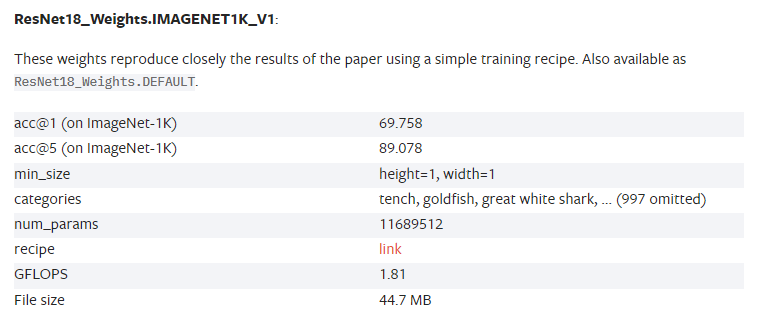


## Training RESNET18 with grayscale

In [ ]:
def convert_rgb_to_grayscale(img):
    if img.mode == 'RGB':  # Check if it's RGB
        return img.convert('L')  # Convertir a escala de grises
    else:
        return img  # Ya está en escala de grises

In [ ]:
class MyTrainingDatasetGray(Dataset):
    def __init__(self, df, directory_path, transform=None):
        self.data = df["filepaths"]  # Assuming your data are filepaths
        self.labels = df['labels']
        self.transform = transform
        self.directory_path = directory_path

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_path = self.data[index]
        img = Image.open(self.directory_path + img_path)  # Load the image from the filepath

        img = convert_rgb_to_grayscale(img)

        if self.transform:
            img = self.transform(img)  # Apply transformations if specified

        label = self.labels[index]
        label = torch.tensor(label, dtype=torch.long)
        return img, label

In [ ]:
# Create an instance of the ResNet18 model
model = resnet18(pretrained=False, num_classes=num_classes)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

import torchvision.transforms as transforms

# Define data augmentation transforms for training images
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Randomly crop the image and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(15),  # Randomly rotate the image by up to 15 degrees
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor (assuming single-channel grayscale)
])

# Define data augmentation transforms for validation and test images
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor (assuming single-channel grayscale)
])

# Create DataLoader instances with data augmentation for training, and without for validation and test datasets
training_dataset = MyTrainingDatasetGray(training_df, images_path, transform=train_transform)
training_data_loader = DataLoader(training_dataset, batch_size=36, num_workers=2, shuffle=True)

val_dataset = MyTrainingDatasetGray(val_df, images_path, transform=val_test_transform)
val_data_loader = DataLoader(val_dataset, batch_size=36, num_workers=2)

test_dataset = MyTrainingDatasetGray(test_df, images_path, transform=val_test_transform)
test_data_loader = DataLoader(test_dataset, batch_size=36, num_workers=2)


In [ ]:
import torch
from sklearn.metrics import precision_score
from tqdm import tqdm

num_epochs = 36

loss_history = []
precision_history = []

best_precision = 0.0  # Initialize the best precision
best_model_path = "/content/drive/MyDrive/Paper/models/best_model_resnet18_grayscale.pth"  # Path to save the best model

# Training loop
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    all_preds = []
    all_labels = []
    for images, labels in training_data_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Get predictions and true labels for precision calculation
        _, preds = torch.max(outputs, 1)  # Get predicted class indices
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Print the average loss for the current epoch
    epoch_loss = running_loss / len(training_data_loader)
    loss_history.append(epoch_loss)
    precision = precision_score(all_labels, all_preds, average="macro")
    precision_history.append(precision)
    print(f'Epoch [{epoch+1}/{num_epochs}], Precision: {precision:.4f}, loss: {epoch_loss:.4f}')

    # Check if the current precision is better than the previous best
    if precision > best_precision:
        best_precision = precision
        # Save the model
        torch.save(model.state_dict(), best_model_path)

print(f"Best precision achieved: {best_precision:.4f}. Model saved at {best_model_path}")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot loss history
plt.plot(range(len(loss_history)), loss_history, label='Loss')

# Plot precision history
plt.plot(range(len(precision_history)), precision_history, label='Precision (Macro)')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Precision (Macro)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Define el path del modelo guardado
best_model_path = "/content/drive/MyDrive/Paper/models/best_model_resnet18_grayscale.pth"

# Define la arquitectura del modelo
best_model_resnet18_grayscale = models.resnet18(pretrained=False)

# Modifica la primera capa convolucional para aceptar imágenes en escala de grises de un solo canal
best_model_resnet18_grayscale.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Reemplaza la capa completamente conectada final con una nueva que coincida con el número de clases
best_model_resnet18_grayscale.fc = torch.nn.Linear(best_model_resnet18_grayscale.fc.in_features, num_classes)

# Carga el diccionario de estado en el modelo en escala de grises
# Asegúrate de cargar en CPU si no deseas usar GPU
best_model_resnet18_grayscale.load_state_dict(torch.load(best_model_path, map_location=torch.device('cpu')))

# Establece el modelo en modo de evaluación
best_model_resnet18_grayscale.eval()

In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Ensure that the device is set properly (e.g., GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
best_model_resnet18_grayscale.to(device)

# Initialize empty lists to store predictions and true labels
predictions = []
true_labels = []

# Disable gradient calculation and use torch.no_grad() to speed up computation
with torch.no_grad():
    # Iterate over the test data loader
    for images, labels in tqdm(test_data_loader, total=len(test_data_loader)):
        # Move images and labels to the device (GPU if available)
        images, labels = images.to(device), labels.to(device)

        # Forward pass through the model
        outputs = best_model_resnet18_grayscale(images)

        # Compute predictions by taking the argmax of the output scores
        _, preds = torch.max(outputs, 1)

        # Convert predictions and labels to numpy arrays and store them
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
test_accuracy = accuracy_score(true_labels, predictions)
test_f1 = f1_score(true_labels, predictions, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Print accuracy and F1-score|
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Visualize confusion matrix
plt.imshow(conf_matrix, cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(num_classes), classes, rotation=90)
plt.yticks(np.arange(num_classes), classes)
plt.show()

In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Ensure that the device is set properly (e.g., GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
best_model_resnet18_grayscale.to(device)

# Initialize empty lists to store predictions and true labels
predictions = []
true_labels = []

# Disable gradient calculation and use torch.no_grad() to speed up computation
with torch.no_grad():
    # Iterate over the test data loader
    for images, labels in tqdm(val_data_loader, total=len(val_data_loader)):
        # Move images and labels to the device (GPU if available)
        images, labels = images.to(device), labels.to(device)

        # Forward pass through the model
        outputs = best_model_resnet18_grayscale(images)

        # Compute predictions by taking the argmax of the output scores
        _, preds = torch.max(outputs, 1)

        # Convert predictions and labels to numpy arrays and store them
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and F1-score
test_accuracy = accuracy_score(true_labels, predictions)
test_f1 = f1_score(true_labels, predictions, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Print accuracy and F1-score|
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Visualize confusion matrix
plt.imshow(conf_matrix, cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(num_classes), classes, rotation=90)
plt.yticks(np.arange(num_classes), classes)
plt.show()

In [ ]:
# # Calculate precision for each class
# class_precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# # Calculate average precision across all classes
# average_precision = np.mean(class_precision)

# # Print precision for each class
# print("Precision for each class:")
# for i, precision in enumerate(class_precision):
#     print(f"Class {i}: {precision:.4f}")

# # Print average precision
# print(f"\nAverage Precision: {average_precision:.4f}")

In [ ]:
# Create a time list (e.g., iterations or epochs)
time = range(1, len(loss_history) + 1)

# Plot the accuracies over time
plt.plot(time, RGB_loss_history, label='RGB')
plt.plot(time, loss_history, label='GrayScale')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Precision')
plt.title('CNN Accuracy Over Time')
plt.legend()

# Show the plot
plt.show()